In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Examining the data

In [40]:
df = pd.read_csv("bank.csv")

In [41]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [42]:
df.education.value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [43]:
df_original = df

We should check if the column with the most number of missing values have more than 25% of missing values. If yes, then we should drop it 

In [6]:
df_original.poutcome.isna().sum()/df.shape[0] *100

22.7

No. So we will leave it in the table

In [7]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


# Encode Ordinal Categorical Attributes

As we have 2 ordinal categorical columns which are 'month' and 'education' we have to scale them to the numerical values.

In [44]:
scale_mapper = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

df['month'] = df['month'].replace(scale_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,9,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,9,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,9,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,9,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,9,208,2,-1,0,NaN,yes


In [45]:
scale_mapper1 = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2
}

df['education'] = df['education'].replace(scale_mapper1)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,9,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,1.0,no,127,no,no,cellular,16,9,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,0.0,no,1154,no,no,telephone,17,9,231,1,-1,0,NaN,yes
1998,46.0,services,married,0.0,no,4343,yes,no,NaN,20,9,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,1.0,no,6403,no,no,cellular,22,9,208,2,-1,0,NaN,yes


# One-Hot Encode All Other Categorical Attributes

First, we need to encode attributes that have missing values on them. 

In [46]:
df = pd.get_dummies(df, columns=['job', 'contact', 'poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,NaN,no,2785,no,no,16,9,327,...,0,1,0,0,0,0,0,0,0,1
1996,28.0,single,1.0,no,127,no,no,16,9,1334,...,0,0,0,0,0,0,0,0,0,1
1997,81.0,married,0.0,no,1154,no,no,17,9,231,...,0,0,0,0,0,1,0,0,0,1
1998,46.0,married,0.0,no,4343,yes,no,20,9,185,...,1,0,0,0,0,0,1,0,0,1
1999,40.0,married,1.0,no,6403,no,no,22,9,208,...,0,0,0,0,0,0,0,0,0,1


Now, we should encode other attributes.

In [47]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,2.0,392,1,4,957,2,131,2,0,...,0,0,0,0,0,1,0,1,0,0
1,39.0,1.0,688,1,4,233,2,133,1,0,...,0,0,0,0,0,0,0,1,1,0
2,59.0,1.0,1035,1,4,126,2,239,1,0,...,0,0,0,0,1,0,0,1,1,0
3,47.0,1.0,398,1,4,274,1,238,2,1,...,0,0,0,0,1,0,0,1,1,0
4,54.0,1.0,1004,1,4,479,1,307,1,0,...,0,0,0,0,1,0,0,1,0,0


In [15]:
df_dummied = df

# Treatment of Missing Values in Numerical Columns

In [48]:
df.isna().sum()

age                   12
education            104
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

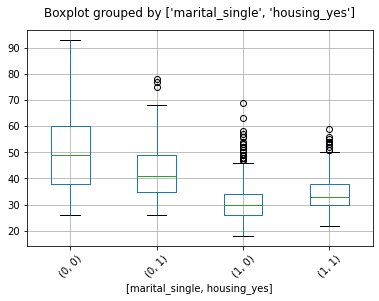

In [17]:
df.boxplot(column='age', by=['marital_single','housing_yes'], rot=45)
plt.title("")
plt.show()

In [49]:
ptable = df.pivot_table(values='age', 
                        index='marital_single',
                        columns='housing_yes',  
                        aggfunc=np.median)
ptable

housing_yes,0,1
marital_single,,
0,49.0,41.0
1,30.0,33.0


In [50]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['marital_single'], x['housing_yes']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

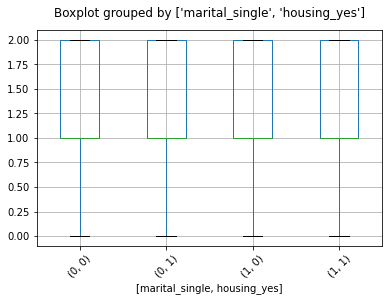

In [51]:
df.boxplot(column='education', by=['marital_single','housing_yes'], rot=45)
plt.title("")
plt.show()

In [52]:
#no trend is seen in the chart so we can just use median to fill the missing values
df['education'].fillna(df['education'].median(), inplace=True)

In [22]:
df_imputed = df

# Rescaling Features

In [53]:
df

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,2.0,392,1,4,957,2,131,2,0,...,0,0,0,0,0,1,0,1,0,0
1,39.0,1.0,688,1,4,233,2,133,1,0,...,0,0,0,0,0,0,0,1,1,0
2,59.0,1.0,1035,1,4,126,2,239,1,0,...,0,0,0,0,1,0,0,1,1,0
3,47.0,1.0,398,1,4,274,1,238,2,1,...,0,0,0,0,1,0,0,1,1,0
4,54.0,1.0,1004,1,4,479,1,307,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,1.0,2785,16,9,327,2,-1,0,0,...,0,0,0,1,0,1,0,0,0,1
1996,28.0,1.0,127,16,9,1334,2,-1,0,0,...,0,0,0,1,0,1,0,0,0,1
1997,81.0,0.0,1154,17,9,231,1,-1,0,0,...,0,0,0,1,1,0,0,0,0,1
1998,46.0,0.0,4343,20,9,185,1,-1,0,0,...,1,0,0,1,1,0,0,1,0,1


In [55]:
robust_scaler = RobustScaler()
df[['age','balance','pdays']] = robust_scaler.fit_transform(df[['age','balance','pdays']])

In [56]:
df.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
1995,-1.000000,1.0,1.548164,16,9,327,2,-1.044223,0,0,...,0,0,0,1,0,1,0,0,0,1
1996,-0.555556,1.0,-0.293832,16,9,1334,2,-1.044223,0,0,...,0,0,0,1,0,1,0,0,0,1
1997,2.388889,0.0,0.417879,17,9,231,1,-1.044223,0,0,...,0,0,0,1,1,0,0,0,0,1
1998,0.444444,0.0,2.627859,20,9,185,1,-1.044223,0,0,...,1,0,0,1,1,0,0,1,0,1
1999,0.111111,1.0,4.055440,22,9,208,2,-1.044223,0,0,...,0,0,0,1,1,0,0,0,0,1


In [27]:
df.day.max()

31

In [28]:
df['day'] = df['day']/31

In [29]:
df.previous.max()

55

In [30]:
df['previous'] = df['previous']/55

In [31]:
df.campaign.max()


11

In [32]:
df['campaign'] = df['campaign']/11

In [33]:
df.month.max()

12

In [34]:
df['month'] = df['month']/12

In [35]:
df.education.max()

2.0

In [57]:
df['education'] = df['education']/2

In [58]:
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,-0.333333,1.0,-0.110187,1,4,957,2,-0.291013,2,0,...,0,0,0,0,0,1,0,1,0,0
1,0.055556,0.5,0.094941,1,4,233,2,-0.279601,1,0,...,0,0,0,0,0,0,0,1,1,0
2,1.166667,0.5,0.335412,1,4,126,2,0.325250,1,0,...,0,0,0,0,1,0,0,1,1,0
3,0.500000,0.5,-0.106029,1,4,274,1,0.319544,2,1,...,0,0,0,0,1,0,0,1,1,0
4,0.888889,0.5,0.313929,1,4,479,1,0.713267,1,0,...,0,0,0,0,1,0,0,1,0,0


In [38]:
df_rescaled = df

# Treatment of Outliers

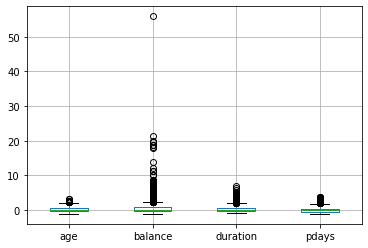

In [28]:
df.boxplot(column=['age','balance','duration','pdays'])
plt.show()

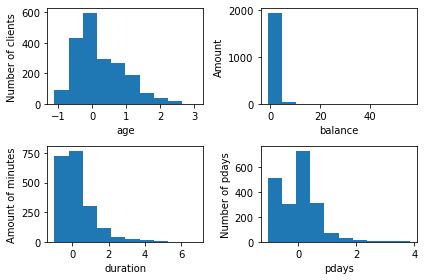

In [29]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# Plot age
ax1.set_xlabel('age')
ax1.set_ylabel('Number of clients')
ax1.hist(df['age'], 10)

# Plot balance
ax2.set_xlabel('balance')
ax2.set_ylabel('Amount')
ax2.hist(df['balance'],10)

# Plot duration
ax3.set_xlabel('duration')
ax3.set_ylabel('Amount of minutes')
ax3.hist(df['duration'],10)

# Plot pdays
ax4.set_xlabel('pdays')
ax4.set_ylabel('Number of pdays')
ax4.hist(df['pdays'],10)

fig.tight_layout()
plt.show()

In [59]:
df[['age','balance','duration','pdays']].min()

age        -1.111111
balance    -1.060984
duration    7.000000
pdays      -1.044223
dtype: float64

In [60]:
# Use a log transformation to decrease the impact of outliers
df['age'] = np.log(df['age']+2.12)
df['balance'] = np.log(df['balance']+2.07)
#df['duration'] = np.log(df['duration']+1.99)
df['pdays'] = np.log(df['pdays']+2.05)

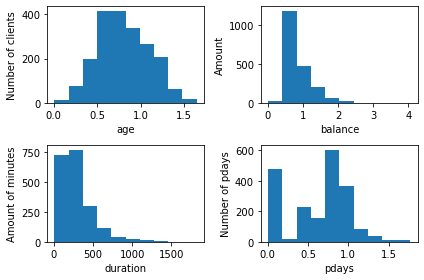

In [61]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# Plot age
ax1.set_xlabel('age')
ax1.set_ylabel('Number of clients')
ax1.hist(df['age'], 10)

# Plot balance
ax2.set_xlabel('balance')
ax2.set_ylabel('Amount')
ax2.hist(df['balance'],10)

# Plot duration
ax3.set_xlabel('duration')
ax3.set_ylabel('Amount of minutes')
ax3.hist(df['duration'],10)

# Plot pdays
ax4.set_xlabel('pdays')
ax4.set_ylabel('Number of pdays')
ax4.hist(df['pdays'],10)

fig.tight_layout()
plt.show()

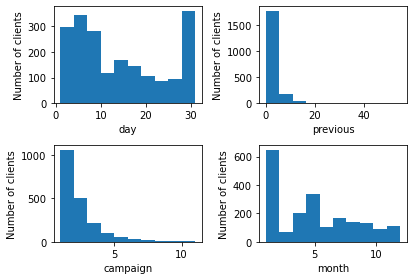

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# Plot day
ax1.set_xlabel('day')
ax1.set_ylabel('Number of clients')
ax1.hist(df['day'], 10)

# Plot previous
ax2.set_xlabel('previous')
ax2.set_ylabel('Number of clients')
ax2.hist(df['previous'],10)

# Plot campaign
ax3.set_xlabel('campaign')
ax3.set_ylabel('Number of clients')
ax3.hist(df['campaign'],10)

# Plot month
ax4.set_xlabel('month')
ax4.set_ylabel('Number of clients')
ax4.hist(df['month'],10)

fig.tight_layout()
plt.show()

# Creation of Derived Features

In [63]:
df['TotalContacts'] = df['campaign'] + df['previous']
df[['TotalContacts']] = robust_scaler.fit_transform(df[['TotalContacts']])
df[['TotalContacts']].min()

TotalContacts   -0.666667
dtype: float64

In [62]:
df

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,0.580352,1.0,0.672849,1,4,957,2,0.564738,2,0,...,0,0,0,0,0,1,0,1,0,0
1,0.777284,0.5,0.772393,1,4,233,2,0.571205,1,0,...,0,0,0,0,0,0,0,1,1,0
2,1.189874,0.5,0.877721,1,4,126,2,0.865103,1,0,...,0,0,0,0,1,0,0,1,1,0
3,0.963174,0.5,0.674968,1,4,274,1,0.862697,2,1,...,0,0,0,0,1,0,0,1,1,0
4,1.101571,0.5,0.868750,1,4,479,1,1.016414,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.113329,0.5,1.285967,16,9,327,2,0.005761,0,0,...,0,0,0,1,0,1,0,0,0,1
1996,0.447531,0.5,0.574458,16,9,1334,2,0.005761,0,0,...,0,0,0,1,0,1,0,0,0,1
1997,1.506051,0.0,0.911431,17,9,231,1,0.005761,0,0,...,0,0,0,1,1,0,0,0,0,1
1998,0.941742,0.0,1.547107,20,9,185,1,0.005761,0,0,...,1,0,0,1,1,0,0,1,0,1


In [64]:
df['TotalContacts'] = np.log(df['TotalContacts']+1.67)

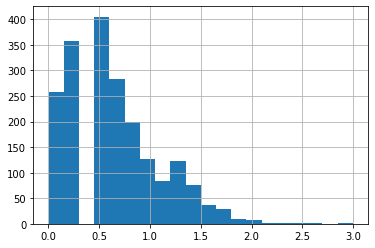

In [37]:
df['TotalContacts'].hist(bins=20)
plt.show()

In [65]:
df.drop('previous', axis=1, inplace=True)

In [49]:
df.head()

,age,education,balance,day,month,duration,campaign,pdays,job_blue-collar,job_entrepreneur,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,TotalContacts
0,0.580352,1.0,0.672849,0.032258,0.333333,1.626181,0.181818,0.564738,0,0,...,0,0,0,0,1,0,1,0,0,0.694812
1,0.777284,0.5,0.772393,0.032258,0.333333,0.681643,0.181818,0.571205,0,0,...,0,0,0,0,0,0,1,1,0,0.512824
2,1.189874,0.5,0.877721,0.032258,0.333333,0.417326,0.181818,0.865103,0,0,...,0,0,0,1,0,0,1,1,0,0.512824
3,0.963174,0.5,0.674968,0.032258,0.333333,0.766904,0.090909,0.862697,1,0,...,0,0,0,1,0,0,1,1,0,0.512824
4,1.101571,0.5,0.868750,0.032258,0.333333,1.109525,0.090909,1.016414,0,0,...,0,0,0,1,0,0,1,0,0,0.290179


# Save the Prepared Dataset

In [66]:
df.to_csv('bank_train_prepared2.csv')